## Concepts related to sampling

|No.| Terms |  Definitions |
|---|-------|--------------|
|1  |point_estimate |a single number based on a sample of size `n` that estimates an unknown population quantity of interest |
|2  |sampling distribution |a distribution of sample statistics, where each sample statistic was calculated a random sample from the same population |
|3  |population |the entire set of entities/objects of interest |
|4  |inference |the process of using observed data to get a good guess of parameters of interest for the population from which the sample of observations were selected from |
|5  |random_sampling |selecting a subset of observations from a population where each observation is equally likely to be selected at any point during the selection process |
|6  |representative_sampling |selecting a subset of observations from a population where the sample’s characteristics are a good representation of the population’s characteristics |
|7  |population_parameter |a numerical summary value about the population |
|8  |sample |a collection of `n` observations from a population |
|9  |census | an exhaustive enumeration/counting of all observations in a finite population in order to compute the population parameter’s numerical value |
|10 |generalizability |how well results based on the sample can be extended to the population |
|11 |sampling |collecting a sample of size `n` of observations from the population |
|12 |observation |a quantity or a quality (or set of these) we collect from a given entity/object |
|13 |observational_unit |is an entity/object from which information (a quantity or a quality) is collected |

In [6]:
# libraries
library(digest)
library(testthat)
library(tidyverse)
library(infer)
library(repr)
library(gridExtra)
library(RColorBrewer)
library(scales)

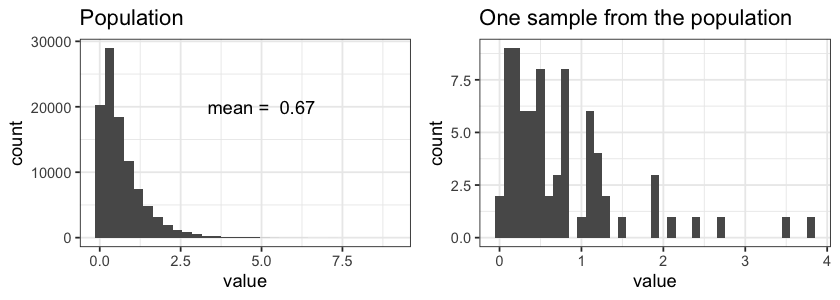

In [7]:
# create POPULATION, calculate pop parameter (mean), and create plot
set.seed(2018)
pop <- tibble(value = rexp(100000,1.5))
pop_mean <- mean(pop$value)
pop_dist <- ggplot(pop, aes(value)) +
    geom_histogram(binwidth = 0.3) + 
    annotate("text", x = 5, y = 20000, label = paste("mean = ", round(pop_mean, 2))) +
    theme_bw()+
    ggtitle("Population")

# take a single ONE SAMPLE (n = 75) and create plot of sample distribution
one_sample <- rep_sample_n(pop, size = 75) %>% ungroup()
one_sample$replicate <- NULL
sample_dist <- ggplot(one_sample, aes(value)) +
    geom_histogram(binwidth = 0.1)  +
    theme_bw()+
    ggtitle("One sample from the population")

options(repr.plot.width = 7, repr.plot.height = 2.5)
grid.arrange(pop_dist, sample_dist, ncol = 2)

In [8]:
# CONFIDENCE INTERVAL - two ways to obtain it:

# One way to answer it
set.seed(2019)
one_sample_95_ci <- one_sample %>% 
##    ungroup(one_sample) %>% 
    specify(response = value) %>% 
    generate(reps = 15000, type = "bootstrap") %>%  # you need to specify bootstrap
    calculate(stat = "mean")  %>% 
    get_ci(level = 0.95) # in this case you put CI, in other cases you put here stat you need

# Other way to obtain the result
set.seed(2019)
one_sample_95_ci2 <- rep_sample_n(one_sample, size = 75, 
                                 reps = 15000, replace = TRUE) %>% 
                    summarize(stat = mean(value)) %>% 
                    get_ci(level = 0.95)

one_sample_95_ci
one_sample_95_ci2

2.5%,97.5%
<dbl>,<dbl>
0.6057328,0.9477092


2.5%,97.5%
<dbl>,<dbl>
0.6057328,0.9477092


Parsed with column specification:
cols(
  Age = col_double(),
  BMI = col_double(),
  Glucose = col_double(),
  Insulin = col_double(),
  HOMA = col_double(),
  Leptin = col_double(),
  Adiponectin = col_double(),
  Resistin = col_double(),
  MCP.1 = col_double(),
  Classification = col_double()
)


Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48,23.50000,70,2.707,0.4674087,8.8071,9.702400,7.99585,417.114,1
83,20.69049,92,3.115,0.7068973,8.8438,5.429285,4.06405,468.786,1
82,23.12467,91,4.498,1.0096511,17.9393,22.432040,9.27715,554.697,1
68,21.36752,77,3.226,0.6127249,9.8827,7.169560,12.76600,928.220,1
86,21.11111,92,3.549,0.8053864,6.6994,4.819240,10.57635,773.920,1
49,22.85446,92,3.226,0.7320869,6.8317,13.679750,10.31760,530.410,1


Warning message:
“Removed 2 rows containing missing values (geom_bar).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

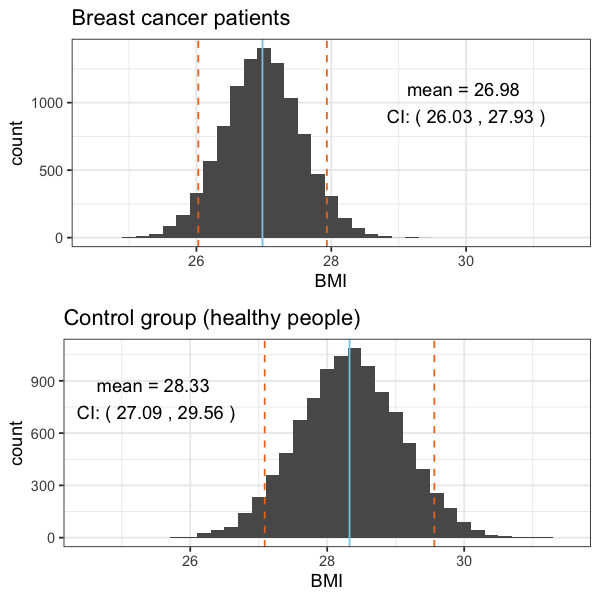

In [9]:
# DIVIDE SAMPLE IN 2 GROUPS, DO BOOTSTRAMP DISTRIBUTION, OBTAIN CONF INTERVAL (CI), AND PLOT ONE OVER THE OTHER

set.seed(2019)
data_bc <- read_csv("data/breast_cancer.csv", col_names = TRUE)

# Divide the sample in two groups: health control and patients
data_controls <- data_bc %>% filter(Classification == 1)
data_patients <- data_bc %>% filter(Classification == 2) # %>%  select (Classification)

# Size of the two groups (returns 52 and 64)
controls_n <- length(data_controls$Classification)
patients_n <- length(data_patients$Classification)

# Bootstratp distribution of BMI mean for controls and patients
controls_bootst_dist <- data_controls %>% 
    rep_sample_n(size = controls_n, 
                 reps = 10000, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(stat = mean(BMI))

patients_bootst_dist <- data_patients %>% 
    rep_sample_n(size = patients_n, 
                 reps = 10000, replace = TRUE) %>% 
    group_by(replicate) %>% 
    summarize(stat = mean(BMI))

# Mean
mean_controls <- controls_bootst_dist %>% select(stat) %>% 
    pull() %>% mean() %>% round(3)
mean_patients <- patients_bootst_dist %>% select(stat) %>% 
    pull() %>% mean() %>% round(3)

# Confidence interval
ci_controls <- controls_bootst_dist %>% ungroup() %>% select(stat) %>% get_ci(level = 0.90)
ci_patients <- patients_bootst_dist %>% ungroup() %>% select(stat) %>% get_ci(level = 0.90)

# Min and Max -  Aux to see the size of the graph in the x-axis
controls_min <- min(controls_bootst_dist$stat)
controls_max <- max(controls_bootst_dist$stat)
patients_min <- min(patients_bootst_dist$stat)
patients_max <- max(patients_bootst_dist$stat)

# Graphs
options(repr.plot.width = 5, repr.plot.height = 5) # set plot display size in Jupyter

head(data_controls)

bootstrap_patients <- ggplot(patients_bootst_dist, aes(stat)) +
    geom_histogram(binwidth = 0.2) +
    xlab("BMI") +
    xlim(c(24.5, 31.5)) +
    ggtitle("Breast cancer patients") +
    theme_bw()+
    geom_vline(xintercept = c(ci_patients[[1]], ci_patients[[2]]),
            color = "chocolate2", lty = 2) +
    geom_vline(xintercept = mean_patients,
              color = "skyblue", lty =1) +
    annotate("text", x = 30, y = 1000,
             label = paste("mean =", round(mean_patients, 2), 
                           "\nCI: (", round(ci_patients[1], 2),
                           ",", round(ci_patients[2], 2), ")"))

bootstrap_controls <- ggplot(controls_bootst_dist, aes(stat)) +
    geom_histogram(binwidth = 0.2) +
    xlab("BMI") +
    xlim(c(24.5, 31.5)) +
    ggtitle("Control group (healthy people)") +
    theme_bw()+
    geom_vline(xintercept = c(ci_controls[[1]], ci_controls[[2]]),
            color = "chocolate2", lty = 2) +
    geom_vline(xintercept = mean_controls,
              color = "skyblue", lty =1) +
    annotate("text", x = 25.5, y = 800, 
             label = paste("mean =", round(mean_controls, 2),
                           "\nCI: (", round(ci_controls[1], 2),
                           ",", round(ci_controls[2], 2), ")"))

grid.arrange(bootstrap_patients, bootstrap_controls, nrow=2)